# Linear regression with one variable
reference:
1. https://www.cnblogs.com/ssyfj/p/12788147.html
2. https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/blob/master/code/ex1-linear%20regression/ML-Exercise1.ipynb

### 1. Importing packages to be used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2.Importing a data set
注意：一定要将数据文件放在和程序同一个文件夹中，否则要使用绝对路径访问文件。

将csv文件读入并转化为数据框DataFrame形式,需要知道路径，指定哪一行作为表头，默认为0，即甚至第一行作为表头，若没有表头，则设置参数header=None,并主动指定列的名称,用列表表示，来添加列名。

In [3]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 3.Data visualisation 

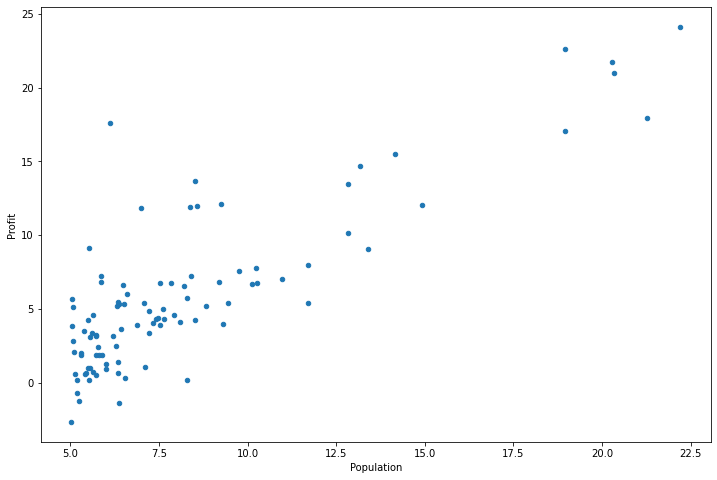

In [5]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

### 4.Creating cost functions

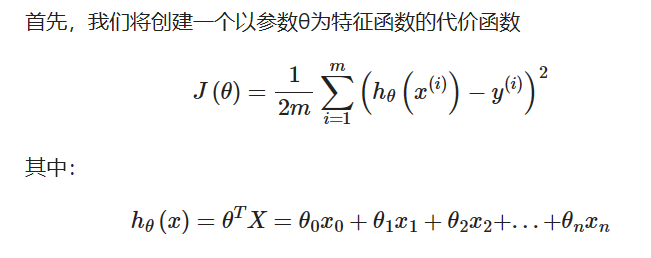

In [6]:
def computeCost(X, y, theta): #输入X是列向量，y也是列向量，theta是行向量
    inner = np.power(((X * theta.T) - y), 2) #X乘以theta的转置就是假设函数　　
    return np.sum(inner) / (2 * len(X)) #求得代价函数

## 补充：numpy中关于*和dot的区别:
对于上面的X*theta.T，我们使用了“*”运算符，进行了矩阵乘法操作。但是我们如果将*当作矩阵乘法，那么我们必须保证两边操作数类型是matrix矩阵类型。另外dot也可以实现矩阵乘法，但是它要求传参是ndarray类型，并且两个数组保持第一个矩阵列数等于第二个矩阵行数。(https://blog.csdn.net/whgyxy/article/details/53930031)

### 5.虽说我们是单变量线性回归，但是我们还是存在一个x_0，全为1，使得我们存在一个常数
Dataframe.insert(loc, column, value, allow_duplicates=False): 在Dataframe的指定列中插入数据。

参数介绍：

       loc:  int型，表示第几列；若在第一列插入数据，则 loc=0

       column: 给插入的列取名，如 column='新的一列'

       value：数字，array，series等都可（可自己尝试）

       allow_duplicates: 是否允许列名重复，选择Ture表示允许新的列名与已存在的列名重复。

In [7]:
data.insert(0,'Ones',1)

### 6.Performing variable initialisation
iloc[ : , : ]
前面的冒号就是取行数，后面的冒号是取列数
左闭右开原则

In [8]:
cols = data.shape[1]    #获取列数   shape[0]是行数
X = data.iloc[:,0:cols-1]   #获取数据集
y = data.iloc[:,cols-1:cols]    #获取标签值---目标变量

### 7.Passing parameters in a cost function
代价函数中传参X,y应该是numpy矩阵，才可以直接计算

由（6）中获取的数据类型是DataFrame类型，因此，我们需要进行类型转换。同时还需要初始化theta,即把theta所有元素都设置为0

In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) # theta是一个(1，2)矩阵

代价函数测试：

In [10]:
computeCost(X,y,theta)

32.072733877455676

### 8.batch gradient descent algorithm

In [11]:
def gradientDescennt(X,y,theta,alpha,iters):    #iters是迭代次数 alpha是步长
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵，暂存theta
    parameters = int(theta.ravel().shape[1])    #ravel计算需要求解的参数个数   功能将多维数组降至一维
    cost = np.zeros(iters) #构建iters个0的数组

    for i in range(iters):  #进行迭代
        error = (X*theta.T)-y   #获取差值
        for j in range(parameters): #更新theta_j
            term = np.multiply(error,X[:,j])    #乘以x_i  因为x_0等于1，所以这个式包含theta_0,theta_1
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)    #更新theta_j

        theta = temp    #更新全部theta值
        cost[i] = computeCost(X,y,theta)    #更新代价值

    return theta, cost

set learning rate and iters

alpha = 0.01
iters = 1000

In [12]:
alpha = 0.01
iters = 1000

g,cost = gradientDescennt(X,y,theta,alpha,iters)    #获取迭代后的theta值，和代价最小值

print(g,cost[-1]) #cost[-1]就是我们最后的最小代价值

[[-3.24140214  1.1272942 ]] 4.515955503078914


### 9.The cost parameters of the training model can be calculated using our fitted theta values --- g

In [13]:
computeCost(X,y,g)

4.515955503078914

### 10.Plot the linear model and the data to see how well it fits

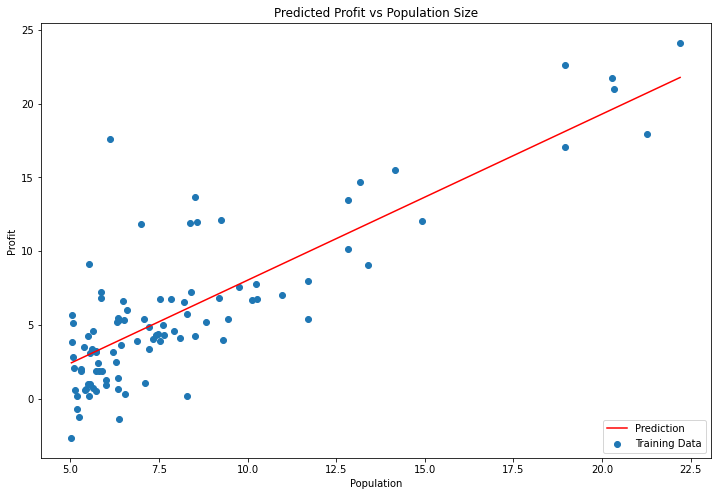

In [14]:
#进行绘图
x = np.linspace(data.Population.min(),data.Population.max(),100)    #抽取100个样本
f = g[0,0]+(g[0,1]*x)   #线性函数，利用x抽取的等距样本绘制线性直线

fig, ax = plt.subplots(figsize=(12,8))    #返回图表以及图表相关的区域，为空代表绘制区域为111--->一行一列图表，选中第一个
ax.plot(x,f,'r',label="Prediction") #绘制直线
ax.scatter(data.Population,data.Profit,label='Training Data')    #绘制散点图
ax.legend(loc=4)    #显示标签位置　　给图加上图例　　'lower right'  : 4,
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs Population Size")
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

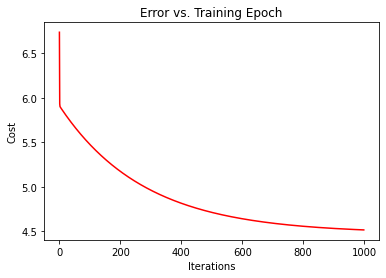

In [15]:
fig, ax = plt.subplots()    #返回图表以及图表相关的区域，为空代表绘制区域为111--->一行一列图表，选中第一个
ax.plot(np.arange(iters),cost,'r') # r ---red color
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()

### 11. full code

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def computeCost(X,y,theta): #输入X是列向量，y也是列向量，theta是行向量
    inner = np.power(((X*theta.T)-y),2) #X乘以theta的转置就是假设函数
    return np.sum(inner)/(2*len(X)) #求得代价函数

def gradientDescennt(X,y,theta,alpha,iters):    #iters是迭代次数
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵，暂存theta
    parameters = int(theta.ravel().shape[1])    #ravel计算需要求解的参数个数   功能将多维数组降至一维
    cost = np.zeros(iters) #构建iters个0的数组

    for i in range(iters):  #进行迭代
        error = (X*theta.T)-y   #获取差值
        for j in range(parameters): #更新theta_j
            term = np.multiply(error,X[:,j])    #乘以x_i  因为x_0等于1，所以这个式包含theta_0,theta_1
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)    #更新theta_j

        theta = temp    #更新全部theta值
        cost[i] = computeCost(X,y,theta)    #更新代价值

    return theta, cost

path = 'E:\Python\MachineLearning\ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.insert(0,'Ones',1)

cols = data.shape[1]    #获取列数   shape[0]是行数
X = data.iloc[:,0:cols-1]   #获取数据集
y = data.iloc[:,cols-1:cols]    #获取标签值---目标变量

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

alpha = 0.01
iters = 1000

g,cost = gradientDescennt(X,y,theta,alpha,iters)    #获取迭代后的theta值，和代价最小值

#进行绘图
fig, ax = plt.subplots()    #返回图表以及图表相关的区域，为空代表绘制区域为111--->一行一列图表，选中第一个
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")
plt.show()
# x = np.linspace(data.Population.min(),data.Population.max(),100)    #抽取100个样本
# f = g[0,0]+(g[0,1]*x)   #线性函数，利用x抽取的等距样本绘制线性直线
#
# fig, ax = plt.subplots()    #返回图表以及图表相关的区域，为空代表绘制区域为111--->一行一列图表，选中第一个
# ax.plot(x,f,'r',label="Prediction") #绘制直线
# ax.scatter(data.Population,data.Profit,label='Training Data')    #绘制散点图
# ax.legend(loc=4)    #显示标签位置
# ax.set_xlabel("Population")
# ax.set_ylabel("Profit")
# ax.set_title("Predicted Profit vs Population Size")
# plt.show()

# print(g,cost[-1])
# print(computeCost(X,y,g))
# data.plot(kind='scatter',x='Population',y="Profit",figsize=(12,8))
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Python\\MachineLearning\\ex1data1.txt'

### 12.(optional)Linear regression functions with scikit-learn
least squares method

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

NameError: name 'X' is not defined